## 1. Download Electrical Grid Stability Simulated Data  dataset and print the dimension of the dataset.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
data = pd.read_csv('Data_for_UCI_named.csv')
pd.options.display.max_columns = None
#Glimpse of Data
data.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959,3.080,8.381,9.781,3.763,-0.783,-1.257,-1.723,0.650,0.860,0.887,0.958,0.055,unstable
1,9.304,4.903,3.048,1.369,5.068,-1.940,-1.873,-1.255,0.413,0.862,0.562,0.782,-0.006,stable
2,8.972,8.848,3.046,1.215,3.405,-1.207,-1.277,-0.920,0.163,0.767,0.839,0.110,0.003,unstable
3,0.716,7.670,4.487,2.341,3.964,-1.027,-1.939,-0.997,0.446,0.977,0.929,0.363,0.029,unstable
4,3.134,7.609,4.944,9.858,3.526,-1.126,-1.846,-0.554,0.797,0.455,0.657,0.821,0.050,unstable
5,6.999,9.109,3.784,4.268,4.430,-1.857,-0.670,-1.902,0.262,0.078,0.543,0.470,-0.017,stable
6,6.710,3.765,6.929,8.819,2.397,-0.615,-1.209,-0.574,0.178,0.398,0.402,0.377,0.006,unstable
7,6.954,1.379,5.719,7.870,3.224,-0.749,-1.187,-1.289,0.371,0.633,0.733,0.381,0.017,unstable
8,4.690,4.008,1.479,3.734,4.041,-1.410,-1.238,-1.393,0.270,0.250,0.165,0.482,-0.039,stable
9,9.841,1.414,9.770,7.642,4.728,-1.991,-0.858,-1.879,0.376,0.544,0.792,0.116,0.012,unstable


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5.250,5.250,5.250,5.250,3.750,-1.250,-1.250,-1.250,0.525,0.525,0.525,0.525,0.016
std,2.743,2.743,2.743,2.743,0.752,0.433,0.433,0.433,0.274,0.274,0.274,0.274,0.037
min,0.501,0.500,0.501,0.500,1.583,-2.000,-2.000,-2.000,0.050,0.050,0.050,0.050,-0.081
25%,2.875,2.875,2.876,2.875,3.218,-1.625,-1.625,-1.625,0.288,0.288,0.288,0.287,-0.016
50%,5.250,5.250,5.250,5.250,3.751,-1.250,-1.250,-1.250,0.525,0.525,0.525,0.525,0.017
75%,7.625,7.625,7.625,7.625,4.282,-0.875,-0.875,-0.875,0.762,0.762,0.762,0.762,0.045
max,9.999,10.000,9.999,9.999,5.864,-0.500,-0.500,-0.500,1.000,1.000,1.000,1.000,0.109


In [6]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(df[feature].value_counts())
        print('\n')

stabf
unstable    6380
stable      3620
Name: count, dtype: int64




In [7]:
for feature in df.columns: 
    if df[feature].dtype != 'object': 
        print(df[feature].value_counts())
        print('\n')

tau1
2.959    1
4.928    1
8.942    1
9.739    1
5.594    1
        ..
3.197    1
5.281    1
8.089    1
6.446    1
6.531    1
Name: count, Length: 10000, dtype: int64


tau2
3.080    1
5.402    1
3.235    1
8.486    1
8.072    1
        ..
6.578    1
6.182    1
3.833    1
5.704    1
6.782    1
Name: count, Length: 10000, dtype: int64


tau3
8.381    1
4.577    1
8.137    1
7.816    1
5.347    1
        ..
6.846    1
2.068    1
4.257    1
9.892    1
4.350    1
Name: count, Length: 10000, dtype: int64


tau4
9.781    1
1.721    1
7.046    1
9.381    1
6.072    1
        ..
4.262    1
0.840    1
9.733    1
0.905    1
8.673    1
Name: count, Length: 10000, dtype: int64


p1
3.763    1
4.771    1
4.248    1
3.871    1
2.843    1
        ..
3.211    1
4.910    1
3.930    1
3.985    1
3.493    1
Name: count, Length: 10000, dtype: int64


p2
-0.783    1
-1.395    1
-0.664    1
-1.427    1
-1.000    1
         ..
-1.352    1
-1.556    1
-1.496    1
-1.730    1
-1.390    1
Name: count, Length: 1

In [8]:
df.isin(['#','$','@','*','.','/','&','!']).sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [9]:
df['stabf'].value_counts(normalize=True)

stabf
unstable   0.638
stable     0.362
Name: proportion, dtype: float64

In [10]:
label_mapping = {'unstable': 0, 'stable': 1}
df['stabf'] = df['stabf'].map(label_mapping)
df.head(10)


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959,3.080,8.381,9.781,3.763,-0.783,-1.257,-1.723,0.650,0.860,0.887,0.958,0.055,0
1,9.304,4.903,3.048,1.369,5.068,-1.940,-1.873,-1.255,0.413,0.862,0.562,0.782,-0.006,1
2,8.972,8.848,3.046,1.215,3.405,-1.207,-1.277,-0.920,0.163,0.767,0.839,0.110,0.003,0
3,0.716,7.670,4.487,2.341,3.964,-1.027,-1.939,-0.997,0.446,0.977,0.929,0.363,0.029,0
4,3.134,7.609,4.944,9.858,3.526,-1.126,-1.846,-0.554,0.797,0.455,0.657,0.821,0.050,0
5,6.999,9.109,3.784,4.268,4.430,-1.857,-0.670,-1.902,0.262,0.078,0.543,0.470,-0.017,1
6,6.710,3.765,6.929,8.819,2.397,-0.615,-1.209,-0.574,0.178,0.398,0.402,0.377,0.006,0
7,6.954,1.379,5.719,7.870,3.224,-0.749,-1.187,-1.289,0.371,0.633,0.733,0.381,0.017,0
8,4.690,4.008,1.479,3.734,4.041,-1.410,-1.238,-1.393,0.270,0.250,0.165,0.482,-0.039,1
9,9.841,1.414,9.770,7.642,4.728,-1.991,-0.858,-1.879,0.376,0.544,0.792,0.116,0.012,0


## 2. Classify the "Electrical Grid Stability Simulated Data"  (target=stabf) available in the dataset using SVM with three different kernels.  Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters. 

In [11]:
X = df.drop('stabf',axis=1)
y = df['stabf']

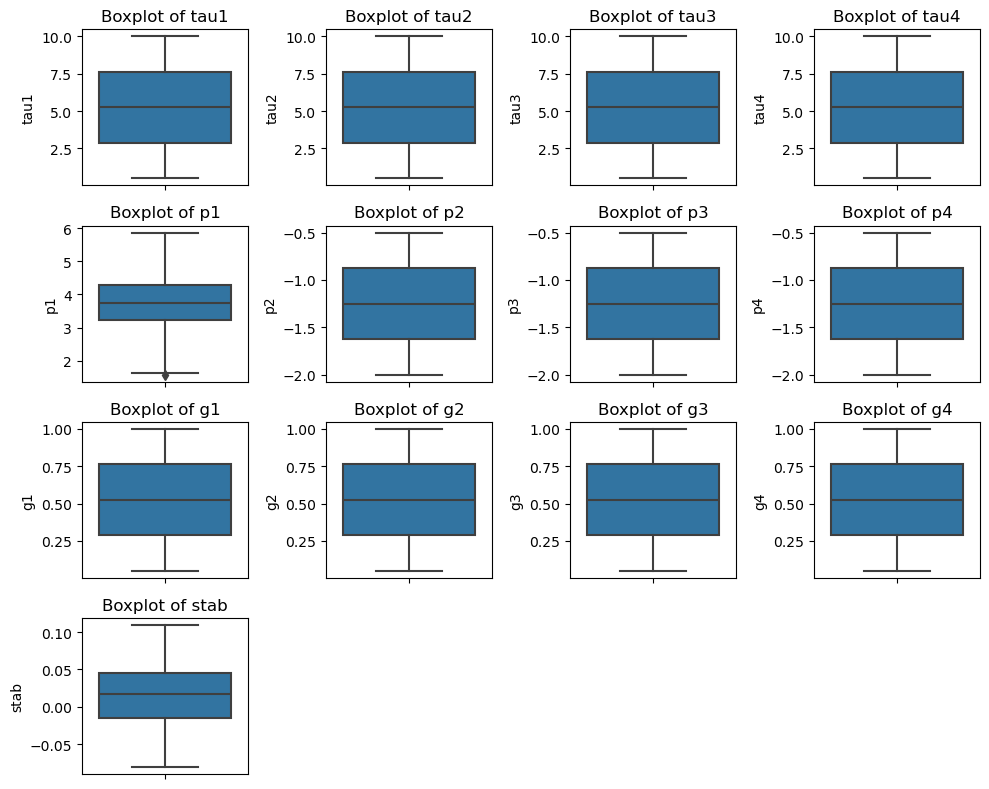

In [12]:
#Check for presence of outliers in each feature
plt.figure(figsize = (10,8))
feature_list =X.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = X[feature_list[i]], data = X)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

tau1
Skew : -0.0


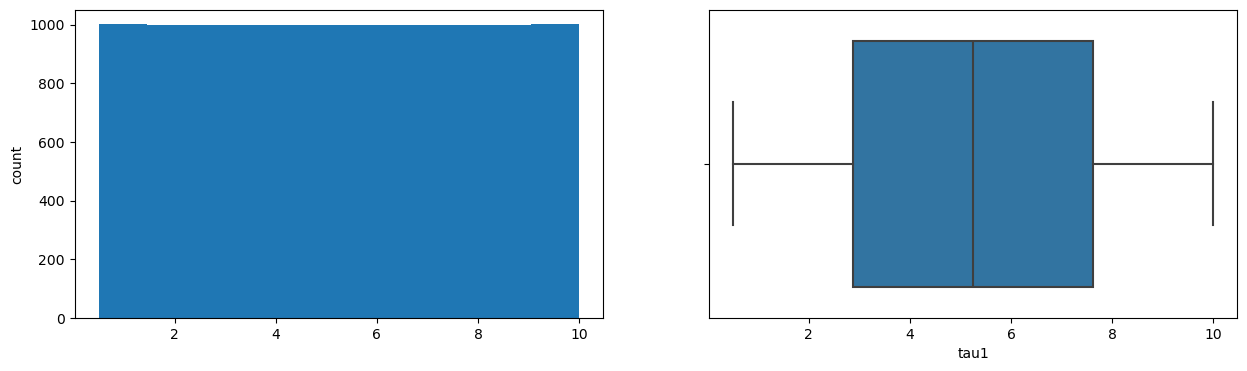

tau2
Skew : 0.0


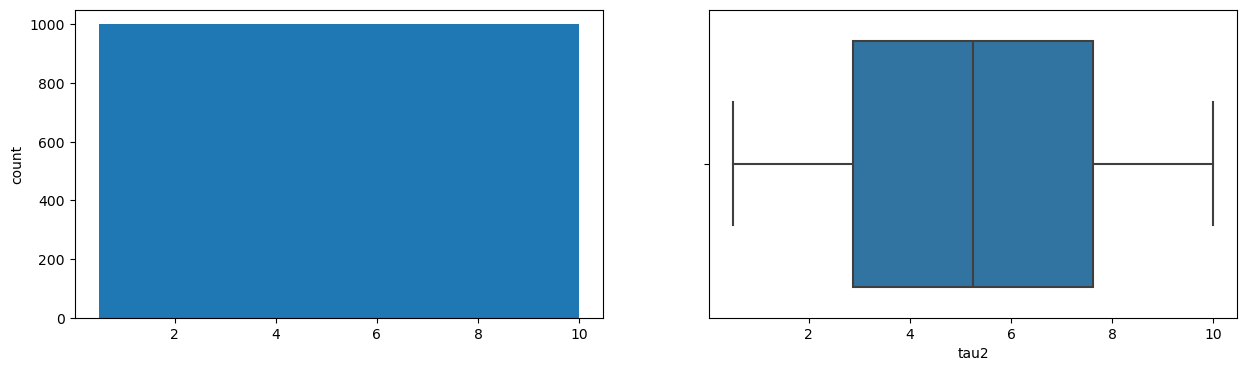

tau3
Skew : -0.0


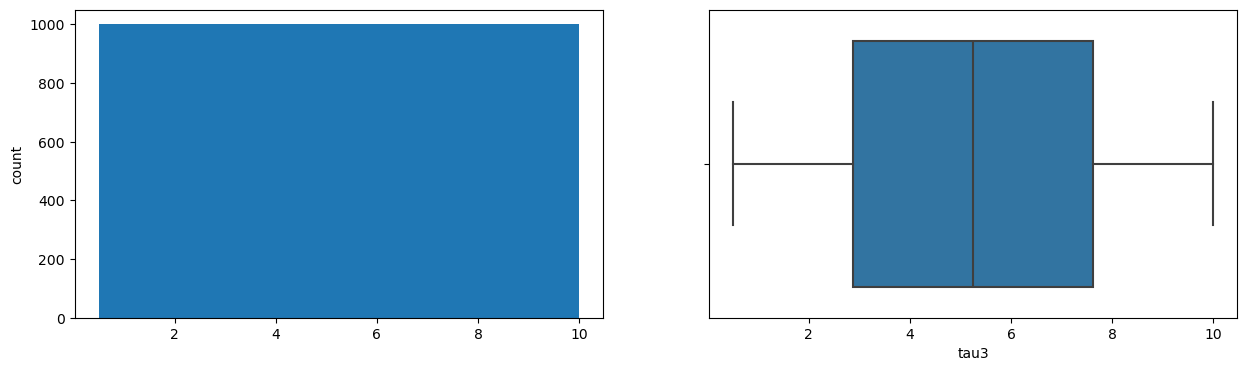

tau4
Skew : -0.0


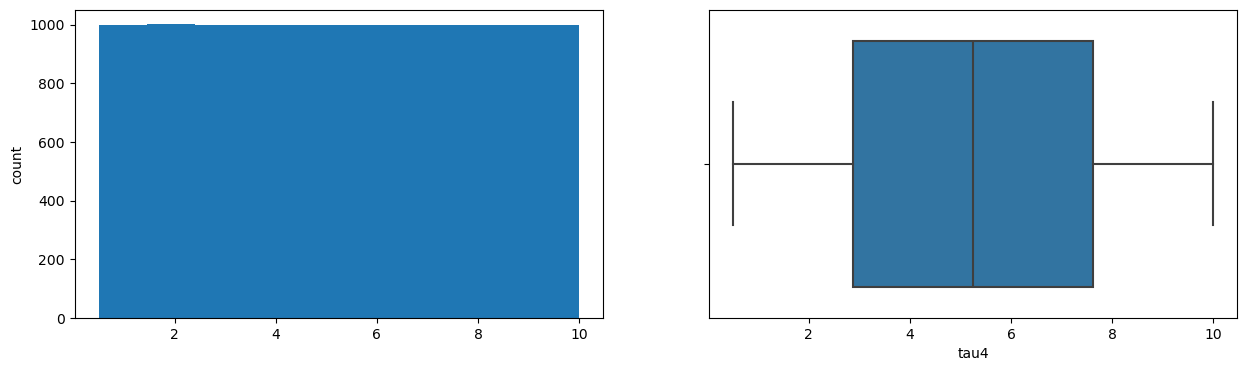

p1
Skew : -0.01


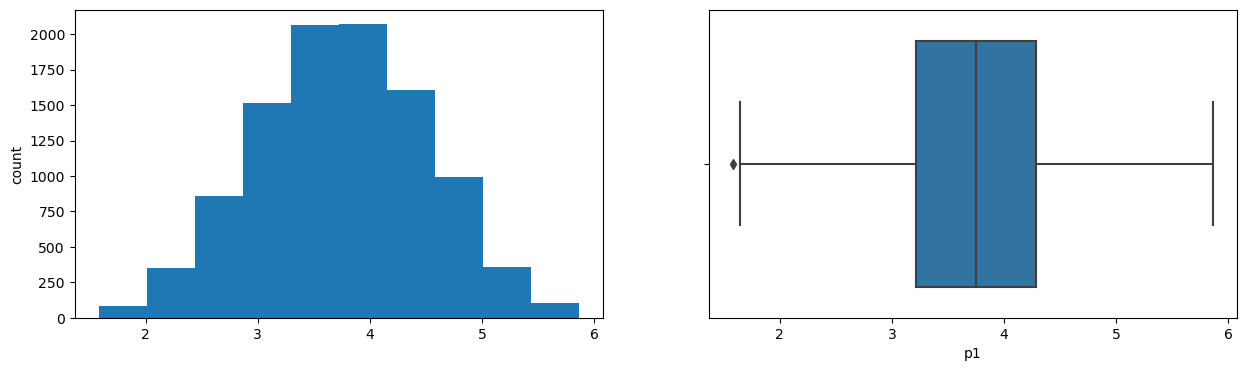

p2
Skew : 0.0


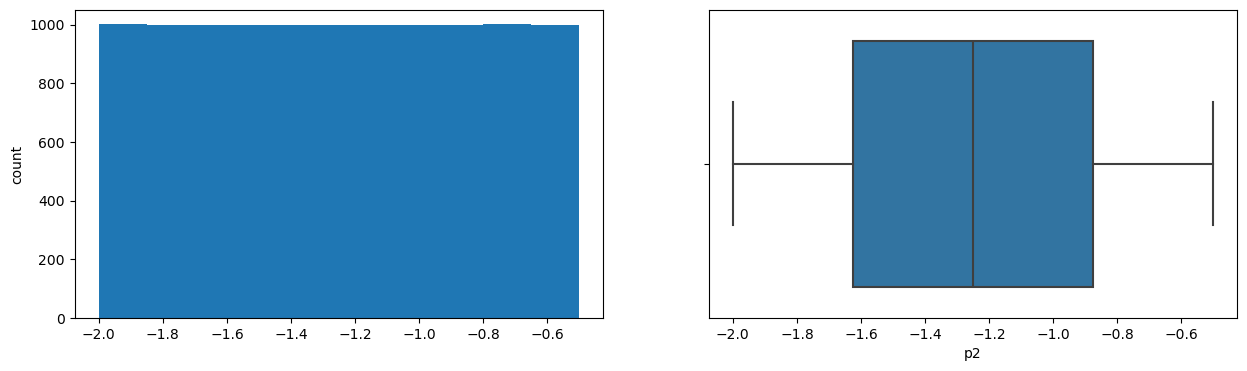

p3
Skew : 0.0


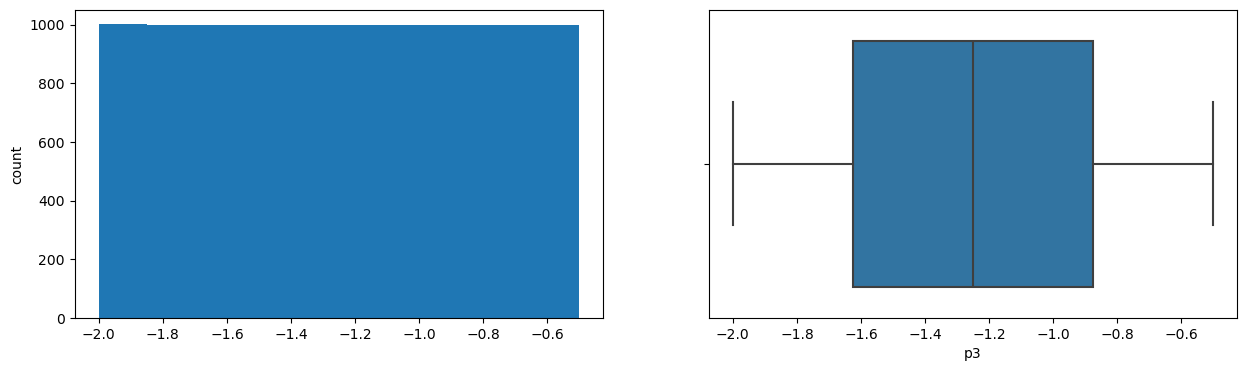

p4
Skew : 0.0


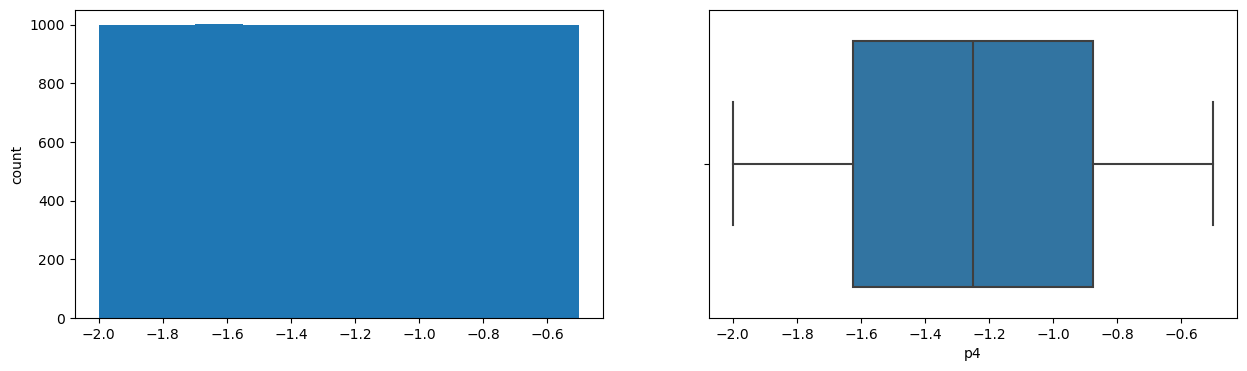

g1
Skew : 0.0


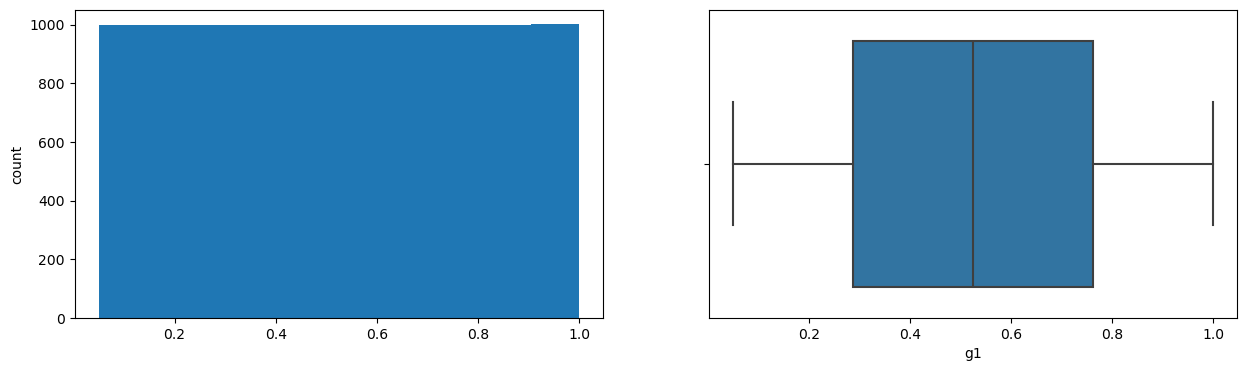

g2
Skew : -0.0


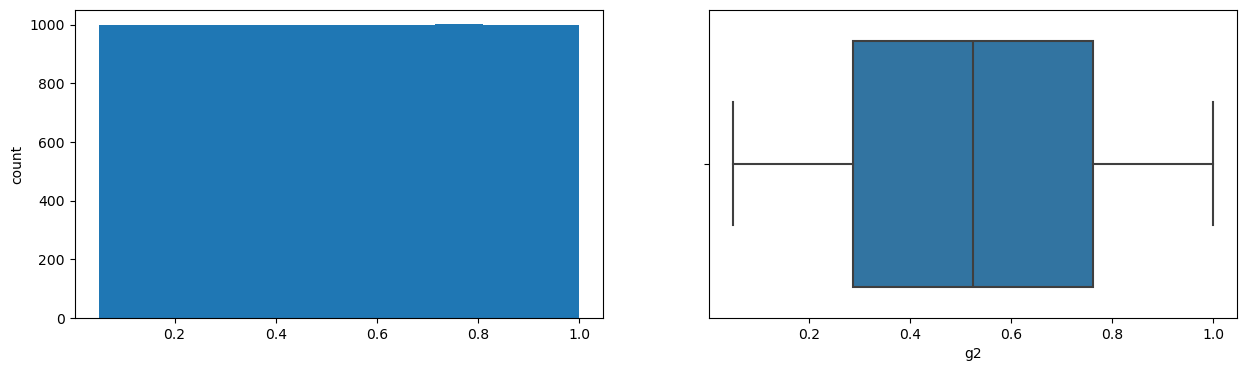

g3
Skew : 0.0


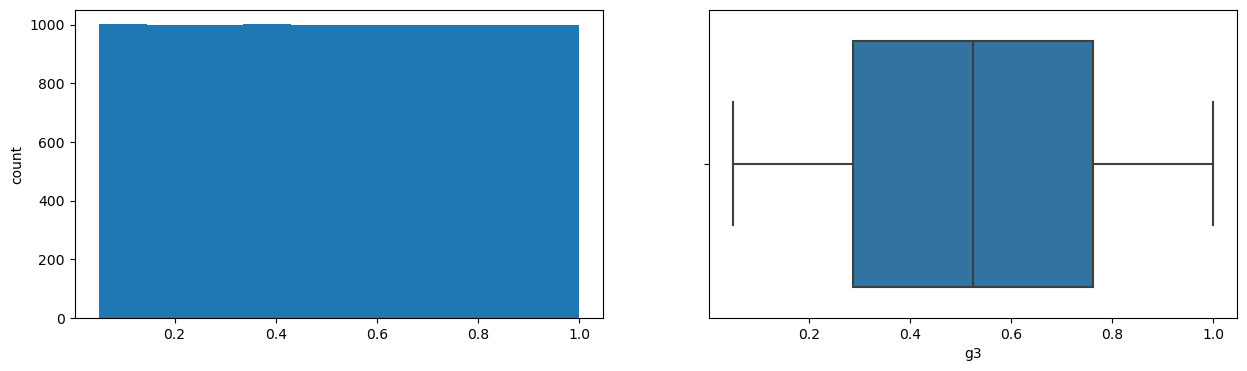

g4
Skew : 0.0


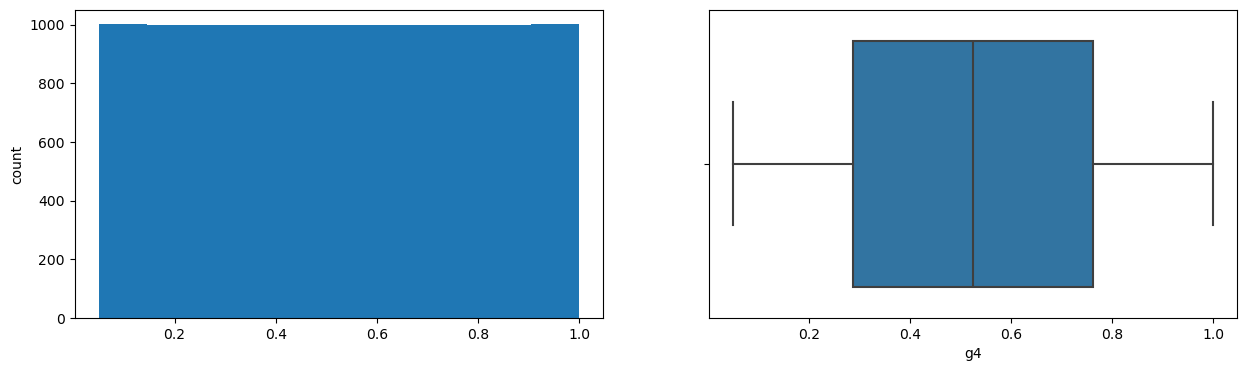

stab
Skew : 0.02


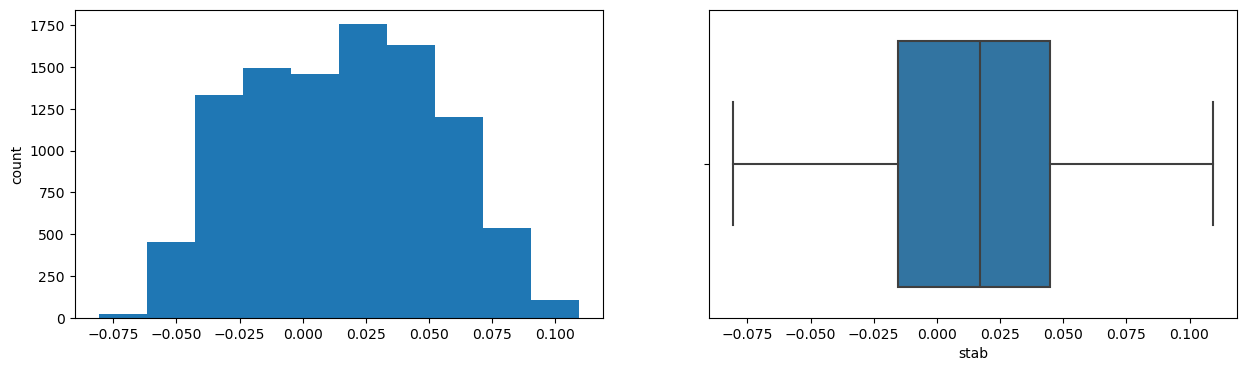

In [13]:
for col in X.columns[:]:
    print(col)
    print('Skew :',round(X[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    X[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=X[col])
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Standardization cannot be done before the partitioning,as we don't want to fit the StandardScaler on
# some observations that will later be used in the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### SVM base model - Training data with 3 different kernels and searching best hyper parameters

In [16]:

# SVM models with different kernels
kernels = ["linear", "rbf", "poly"]
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    train_y_pred = svm_model.predict(X_train)
    acc = accuracy_score(y_train, train_y_pred)
    print(f"Model with {kernel} kernel - Train Accuracy: {acc:.4f}")
    print(classification_report(y_train, train_y_pred))
        
# linear Hyperparameter tuning using GridSearchCV
    if kernel == "linear":
        param_grid_linear = {'C': [0.1, 1, 10, 100]}
        grid_search = GridSearchCV(SVC(kernel="linear"), param_grid_linear, cv=5)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print(f"Best hyperparameters for linear kernel: {best_params}")
        
# rbf Hyperparameter  tuning using GridSearchCV
    if kernel == "rbf":
        param_grid_rbf = {"C": [0.1, 1, 10], "gamma": [0.1, 1, 10]}
        grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid_rbf, cv=5)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print(f"Best hyperparameters for RBF kernel: {best_params}")
# poly Hyperparameter tuning using GridSearchCV
    if kernel == "poly":
        param_grid_poly = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]}
        grid_search = GridSearchCV(SVC(kernel="poly"), param_grid_poly, cv=5)
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print(f"Best hyperparameters for poly kernel: {best_params}")

Model with linear kernel - Train Accuracy: 0.9981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5073
           1       1.00      1.00      1.00      2927

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Best hyperparameters for linear kernel: {'C': 100}
Model with rbf kernel - Train Accuracy: 0.9948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5073
           1       0.99      0.99      0.99      2927

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Best hyperparameters for RBF kernel: {'C': 1, 'gamma': 0.1}
Model with poly kernel - Train Accuracy: 0.9835
              precision    recall  f1-score   support

           0       0.98      0.99  

### SVM Model - Testing data with 3 different kernels

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM models with different kernels
kernels = ["linear", "rbf", "poly"]
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    test_y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, test_y_pred)
    print(f"Model with {kernel} kernel -Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, test_y_pred))      

Model with linear kernel -Test Accuracy: 0.9455
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1307
           1       0.92      0.92      0.92       693

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000

Model with rbf kernel -Test Accuracy: 0.8880
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1307
           1       0.85      0.82      0.84       693

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.88      2000
weighted avg       0.89      0.89      0.89      2000

Model with poly kernel -Test Accuracy: 0.9025
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1307
           1       0.84      0.89      0.86       693

    accuracy                           0.90

### Tuned SVM model with Linear kernel and best hyper parameter 

Training Accuracy :  0.996375
Confusion matrix
[[5060   13]
 [  16 2911]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5073
           1       1.00      0.99      1.00      2927

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Accuracy :  0.9945
Confusion matrix
[[1301    6]
 [   5  688]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1307
           1       0.99      0.99      0.99       693

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



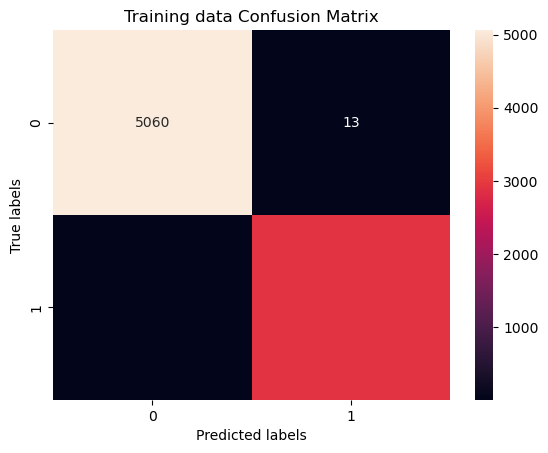

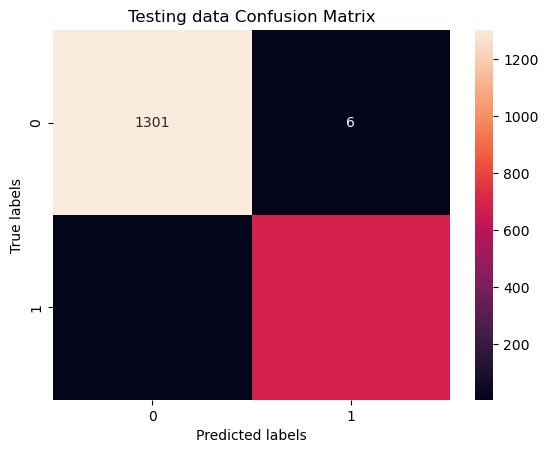

In [18]:
linear_svc = SVC(kernel='linear',C=100) 
linear_svc.fit(X_train, y_train)

## Performance Matrix on train data set
linear_svc_ypred_train = linear_svc.predict(X_train)
linear_svc_train_score = linear_svc.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",linear_svc_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, linear_svc_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, linear_svc_ypred_train))## classification_report
## Performance Matrix on test data set
linear_svc_ypred_test = linear_svc.predict(X_test)
linear_svc_test_score = linear_svc.score(X_test, y_test)
print("Testing Accuracy : ",linear_svc_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, linear_svc_ypred_test))
print(metrics.classification_report(y_test, linear_svc_ypred_test))
# Example confusion matrix (replace with your actual values)
train_linearconf =metrics.confusion_matrix(y_train, linear_svc_ypred_train)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(train_linearconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual values)
test_linearconf =metrics.confusion_matrix(y_test, linear_svc_ypred_test)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(test_linearconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


### Tuned SVM model with RBF kernel and best hyper parameter

Training Accuracy :  0.93575
Confusion matrix
[[4914  159]
 [ 355 2572]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5073
           1       0.94      0.88      0.91      2927

    accuracy                           0.94      8000
   macro avg       0.94      0.92      0.93      8000
weighted avg       0.94      0.94      0.94      8000

Testing Accuracy :  0.897
Confusion matrix
[[1214   93]
 [ 113  580]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1307
           1       0.86      0.84      0.85       693

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



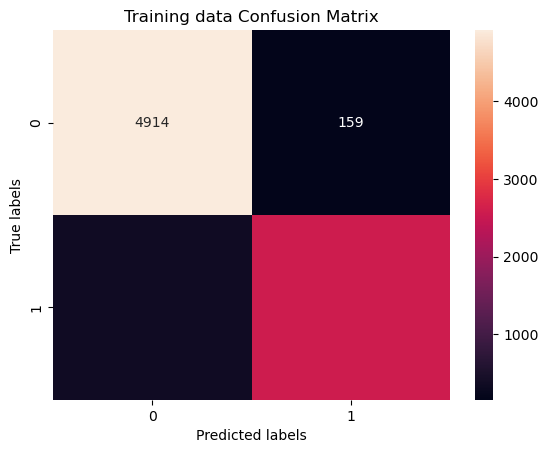

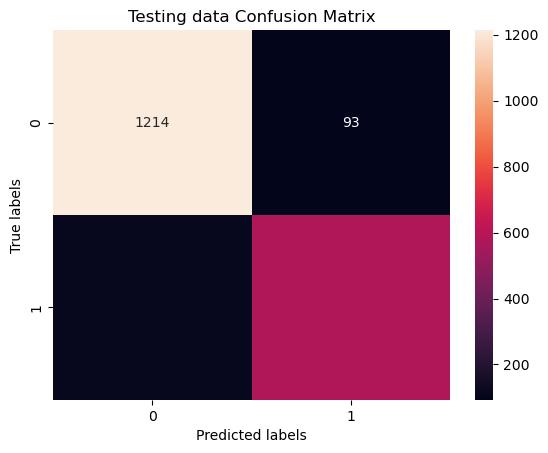

In [19]:
rbf_svc = SVC(kernel="rbf", C=1,gamma = 0.1).fit(X_train, y_train)
## Performance Matrix on train data set
rbf_svc_ypred_train = rbf_svc.predict(X_train)
rbf_svc_train_score = rbf_svc.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",rbf_svc_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, rbf_svc_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, rbf_svc_ypred_train))## classification_report
## Performance Matrix on test data set
rbf_svc_ypred_test = rbf_svc.predict(X_test)
rbf_svc_test_score = rbf_svc.score(X_test, y_test)
print("Testing Accuracy : ",rbf_svc_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, rbf_svc_ypred_test))
print(metrics.classification_report(y_test, rbf_svc_ypred_test))

# Example confusion matrix (replace with your actual values)
rbf_trainconf =metrics.confusion_matrix(y_train, rbf_svc_ypred_train)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(rbf_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
rbf_testconf =metrics.confusion_matrix(y_test, rbf_svc_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(rbf_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


### Tuned SVM model with poly kernel and best hyper parameter

Training Accuracy :  0.9525
Confusion matrix
[[4874  199]
 [ 181 2746]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5073
           1       0.93      0.94      0.94      2927

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000

Testing Accuracy :  0.94
Confusion matrix
[[1241   66]
 [  54  639]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1307
           1       0.91      0.92      0.91       693

    accuracy                           0.94      2000
   macro avg       0.93      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000



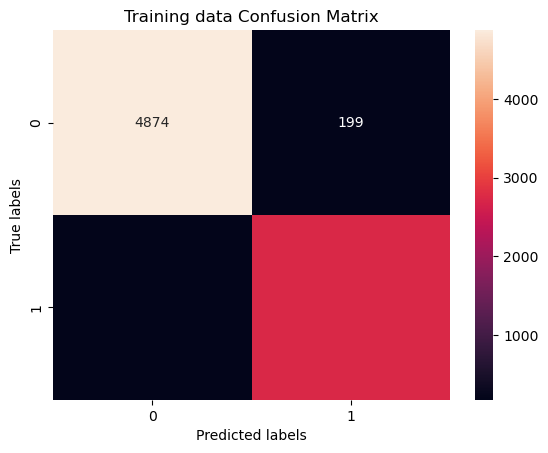

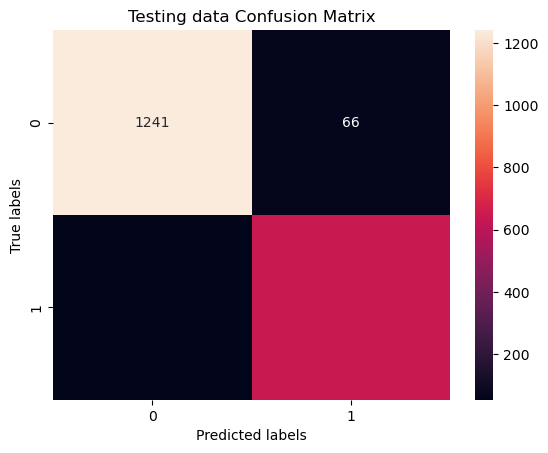

In [20]:
poly_svc = SVC(kernel="poly", C=10,degree = 3).fit(X_train, y_train)
## Performance Matrix on train data set
poly_svc_ypred_train = poly_svc.predict(X_train)
poly_svc_train_score = poly_svc.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",poly_svc_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, poly_svc_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, poly_svc_ypred_train))## classification_report
## Performance Matrix on test data set
poly_svc_ypred_test = poly_svc.predict(X_test)
poly_svc_test_score = poly_svc.score(X_test, y_test)
print("Testing Accuracy : ",poly_svc_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, poly_svc_ypred_test))
print(metrics.classification_report(y_test, poly_svc_ypred_test))

# Example confusion matrix (replace with your actual values)
poly_svc_train_conf =metrics.confusion_matrix(y_train, poly_svc_ypred_train)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(poly_svc_train_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
poly_svc_test_conf =metrics.confusion_matrix(y_test, poly_svc_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(poly_svc_test_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


## performace metrics svm

In [21]:

model_performance = {'model_name': ['linear kernel Base model','RBF kernel Base model','poly kernel Base model',
                          'Linear kernel with GrCV','RBF kernel with GrCV','poly kernel with GrCV'],
    'Training Accuracy':['99.81','99.48','98.35','99.63','93.57','95.25'],
    'Testing Accuracy':['94.55','88.80','90.25','99.45','89.70','94.00'],
    'Hyper parameters used':['Default','Default','Default','C','C & gamma','C & degree']}


In [22]:
All_models = pd.DataFrame(model_performance)
All_models.sort_values(by='Testing Accuracy')

,model_name,Training Accuracy,Testing Accuracy,Hyper parameters used
1,RBF kernel Base model,99.48,88.80,Default
4,RBF kernel with GrCV,93.57,89.70,C & gamma
2,poly kernel Base model,98.35,90.25,Default
5,poly kernel with GrCV,95.25,94.00,C & degree
0,linear kernel Base model,99.81,94.55,Default
3,Linear kernel with GrCV,99.63,99.45,C


 
## 3. Continue from question 2, use the same training and test set, use KNN and tune K on the training set, report the performance on the test set and the optimal K. 

### K Neighbors binary Classifier base model

Training Accuracy :  0.857625
Confusion matrix
[[4656  417]
 [ 722 2205]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5073
           1       0.84      0.75      0.79      2927

    accuracy                           0.86      8000
   macro avg       0.85      0.84      0.84      8000
weighted avg       0.86      0.86      0.86      8000

Testing Accuracy :  0.7895
Confusion matrix
[[1110  197]
 [ 224  469]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1307
           1       0.70      0.68      0.69       693

    accuracy                           0.79      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.79      0.79      0.79      2000



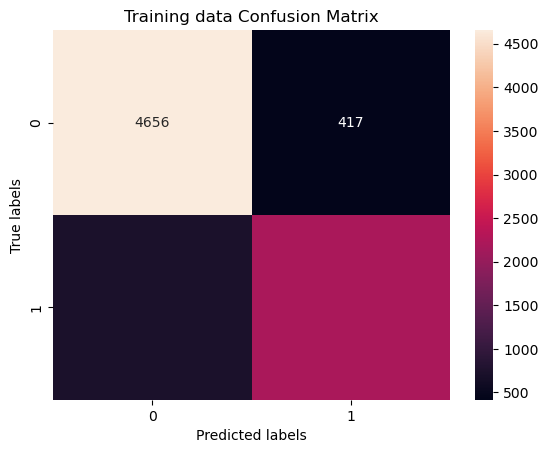

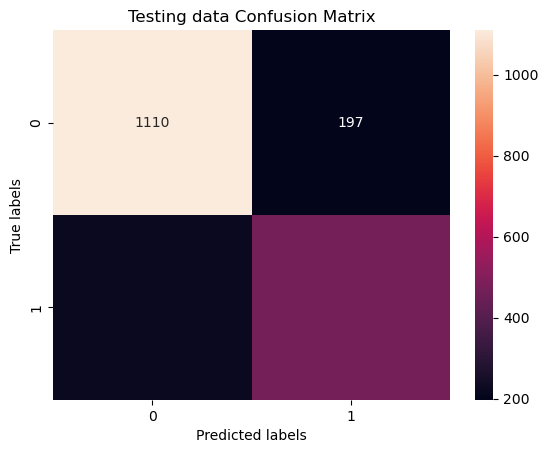

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
## Performance Matrix on train data set
knn_model_ypred_train = knn_model.predict(X_train)
knn_model_train_score = knn_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",knn_model_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, knn_model_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, knn_model_ypred_train))## classification_report
## Performance Matrix on test data set
knn_model_ypred_test = knn_model.predict(X_test)
knn_model_test_score = knn_model.score(X_test, y_test)
print("Testing Accuracy : ",knn_model_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, knn_model_ypred_test))
print(metrics.classification_report(y_test, knn_model_ypred_test))

# Example confusion matrix (replace with your actual values)
knn_model_train_conf =metrics.confusion_matrix(y_train, knn_model_ypred_train)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(knn_model_train_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
knn_model_test_conf =metrics.confusion_matrix(y_test, knn_model_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(knn_model_test_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()

AUC: 0.930
AUC: 0.841


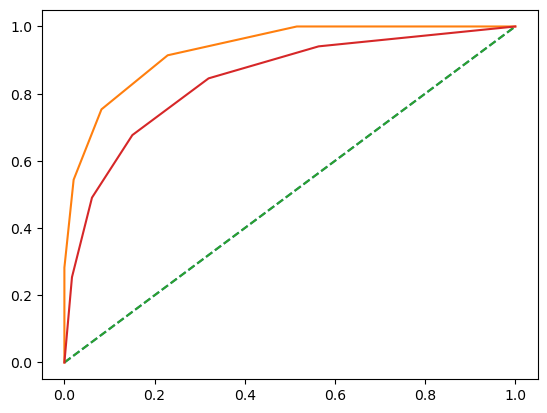

In [24]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = knn_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Tuning K Neighbors binary Classifier model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": range(1, 21), 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, param_grid, cv=10)  # Use cross-validation (e.g., 5-fold)

clf_knn.fit(X_train, y_train)
best_params = clf_knn.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 11}

Training Accuracy :  0.86675
Confusion matrix
[[4732  341]
 [ 725 2202]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5073
           1       0.87      0.75      0.81      2927

    accuracy                           0.87      8000
   macro avg       0.87      0.84      0.85      8000
weighted avg       0.87      0.87      0.86      8000

Testing Accuracy :  0.825
Confusion matrix
[[1159  148]
 [ 202  491]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1307
           1       0.77      0.71      0.74       693

    accuracy                           0.82      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.82      0.82      0.82      2000



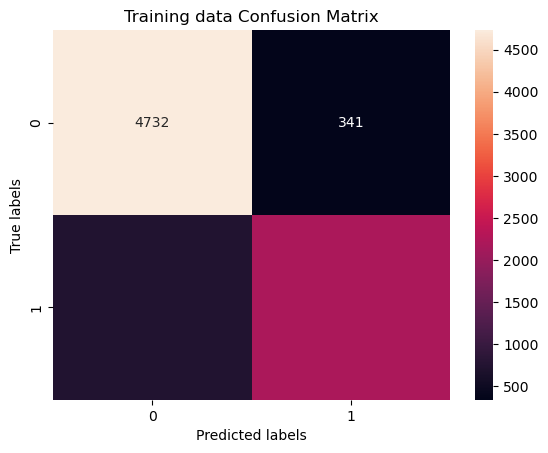

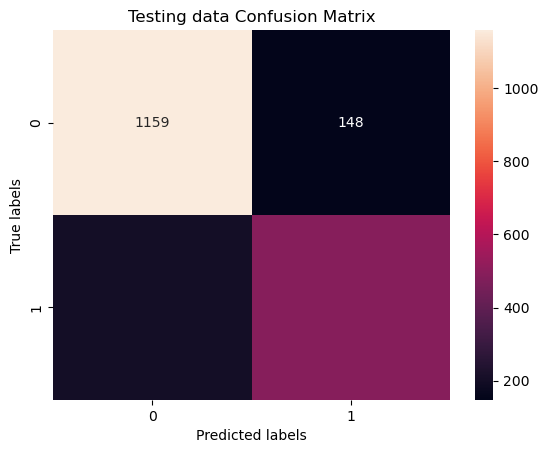

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
knn_model.fit(X_train, y_train)
## Performance Matrix on train data set
knn_model_ypred_train = knn_model.predict(X_train)
knn_model_train_score = knn_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",knn_model_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, knn_model_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, knn_model_ypred_train))## classification_report
## Performance Matrix on test data set
knn_model_ypred_test = knn_model.predict(X_test)
knn_model_test_score = knn_model.score(X_test, y_test)
print("Testing Accuracy : ",knn_model_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, knn_model_ypred_test))
print(metrics.classification_report(y_test, knn_model_ypred_test))

# Example confusion matrix (replace with your actual values)
knn_modeltrain_conf =metrics.confusion_matrix(y_train, knn_model_ypred_train)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(knn_modeltrain_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
knn_modeltest_conf =metrics.confusion_matrix(y_test, knn_model_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(knn_modeltest_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.940
AUC: 0.898


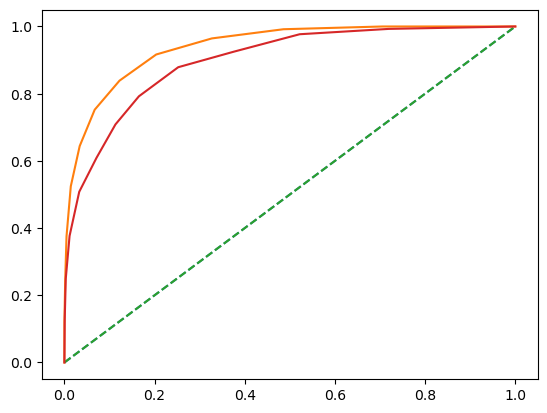

In [27]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = knn_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

KNN model optimal K value is 11 

### KNN model performace report

In [28]:

model_performance = {'model_name': ['KNN Base model','Tuned KNN model with GrCV'],
    'Training Accuracy':['85.76','86.67'],
    'Testing Accuracy':['78.95','82.50'],
    'Training AUC':['93.0','94.0'],
    'Testing AUC':['84.1','89.8'],
    'Hyper parameters used':['Default','metric: manhattan & n_neighbors(K-value): 11']}


In [29]:
All_models = pd.DataFrame(model_performance)
All_models.sort_values(by='Testing Accuracy')

,model_name,Training Accuracy,Testing Accuracy,Training AUC,Testing AUC,Hyper parameters used
0,KNN Base model,85.76,78.95,93.0,84.1,Default
1,Tuned KNN model with GrCV,86.67,82.50,94.0,89.8,metric: manhattan & n_neighbors(K-value): 11


## 4. Continue from question 2, use the same training and test set, use Decision Tree and tune the depth of the tree on the training set, report the performance on the test set and the optimal depth.

### DecisionTreeClassifier base model

Training Accuracy :  1.0
Confusion matrix
[[5073    0]
 [   0 2927]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5073
           1       1.00      1.00      1.00      2927

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Accuracy :  0.9995
Confusion matrix
[[1306    1]
 [   0  693]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1307
           1       1.00      1.00      1.00       693

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



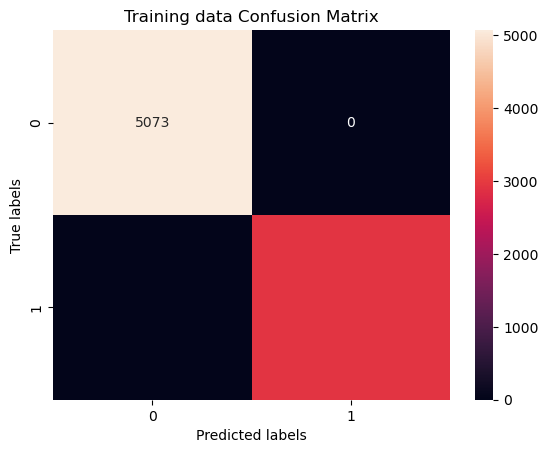

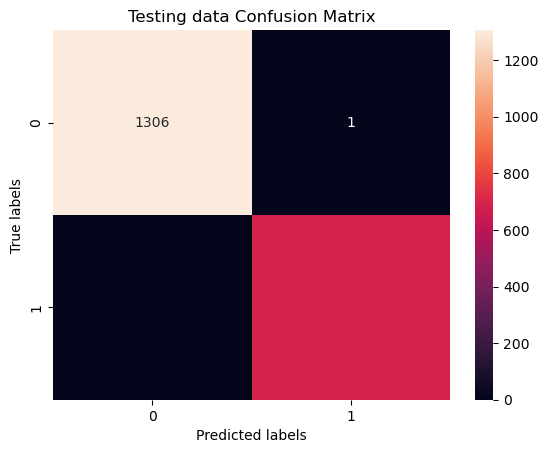

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
## Performance Matrix on train data set
dt_model_ypred_train = dt_model.predict(X_train)
dt_model_train_score = dt_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",dt_model_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, dt_model_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, dt_model_ypred_train))## classification_report
## Performance Matrix on test data set
dt_model_ypred_test = dt_model.predict(X_test)
dt_model_test_score = dt_model.score(X_test, y_test)
print("Testing Accuracy : ",dt_model_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, dt_model_ypred_test))
print(metrics.classification_report(y_test, dt_model_ypred_test))

# Example confusion matrix (replace with your actual values)
dt_modeltrain_conf =metrics.confusion_matrix(y_train, dt_model_ypred_train)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(dt_modeltrain_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
dt_modeltest_conf =metrics.confusion_matrix(y_test, dt_model_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(dt_modeltest_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 1.000
AUC: 1.000


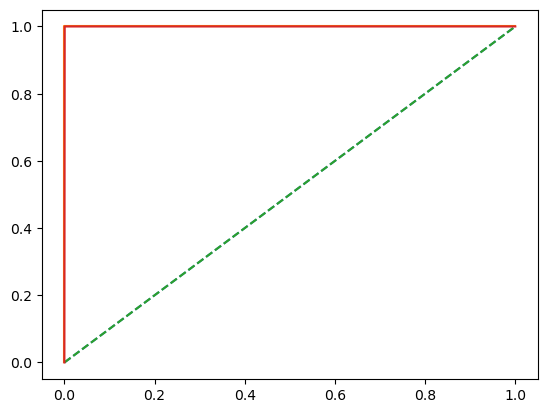

In [31]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### DecisionTreeClassifier tuned model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Hyperparameter tuning: Try different max_depth values
max_depth_values = [3,5, 7, 9,11,13,15,17,19]

best_accuracy = 0
optimal_depth = None

for depth in max_depth_values:
    # Train the model with the specified depth
    tree_model.set_params(max_depth=depth)
    tree_model.fit(X_train, y_train)

    # Evaluate on the validation set
    y_pred = tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Update best accuracy and optimal depth
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        optimal_depth = depth

print("Optimal Depth:", optimal_depth)
print("Test Set Accuracy:", best_accuracy)


Optimal Depth: 3
Test Set Accuracy: 0.9995


In [33]:
# Define hyperparameters to tune
param_grid = {
    "max_depth": [3, 5, 7, 9],  # Vary the depth of the tree
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Grid Search CV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_depth = grid_search.best_params_["max_depth"]

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Optimal depth: {best_depth}")
print(f"Test accuracy: {test_accuracy:.4f}")

Optimal depth: 3
Test accuracy: 0.9995


In [34]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training Accuracy :  1.0
Confusion matrix
[[5073    0]
 [   0 2927]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5073
           1       1.00      1.00      1.00      2927

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Accuracy :  0.9995
Confusion matrix
[[1306    1]
 [   0  693]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1307
           1       1.00      1.00      1.00       693

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



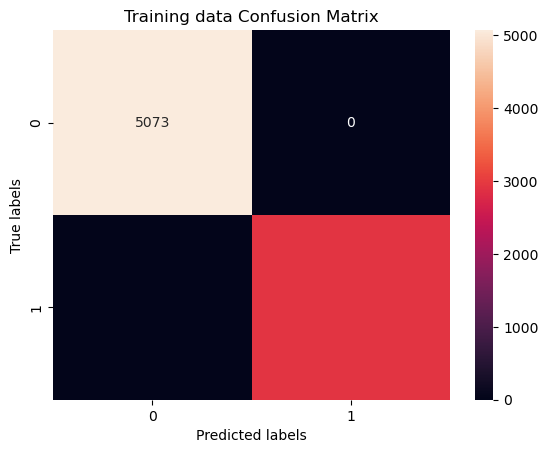

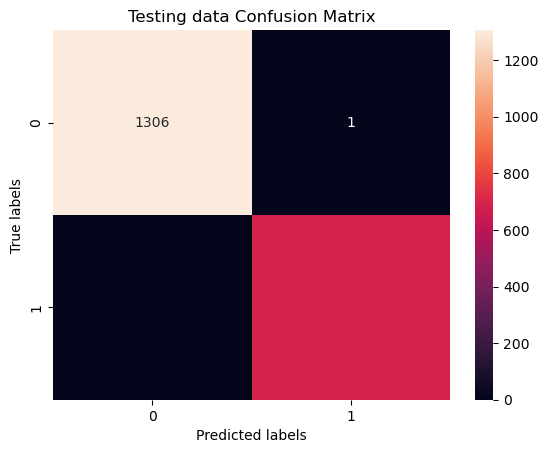

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3,min_samples_leaf= 1, min_samples_split= 2)
dt_model.fit(X_train, y_train)
## Performance Matrix on train data set
dt_model_ypred_train = dt_model.predict(X_train)
dt_model_train_score = dt_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",dt_model_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, dt_model_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, dt_model_ypred_train))## classification_report
## Performance Matrix on test data set
dt_model_ypred_test = dt_model.predict(X_test)
dt_model_test_score = dt_model.score(X_test, y_test)
print("Testing Accuracy : ",dt_model_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, dt_model_ypred_test))
print(metrics.classification_report(y_test, dt_model_ypred_test))

# Example confusion matrix (replace with your actual values)
dt_modeltrain_conf =metrics.confusion_matrix(y_train, dt_model_ypred_train)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(dt_modeltrain_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
dt_modeltest_conf =metrics.confusion_matrix(y_test, dt_model_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(dt_modeltest_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 1.000
AUC: 1.000


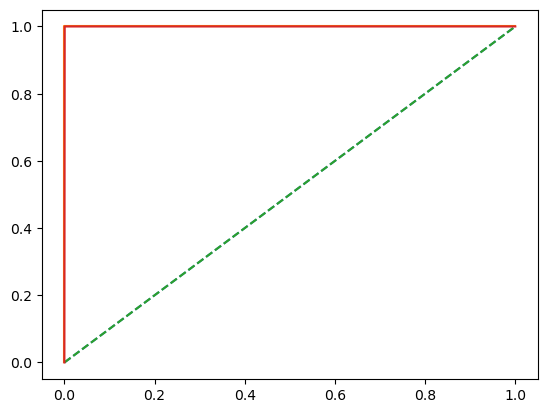

In [36]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### manual tuning DT model

Training Accuracy :  1.0
Confusion matrix
[[5073    0]
 [   0 2927]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5073
           1       1.00      1.00      1.00      2927

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Accuracy :  0.9995
Confusion matrix
[[1306    1]
 [   0  693]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1307
           1       1.00      1.00      1.00       693

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



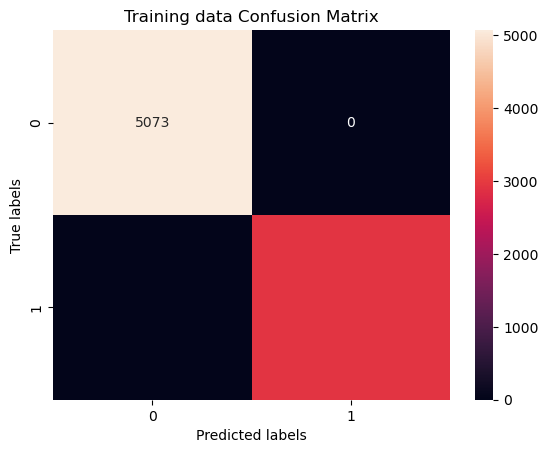

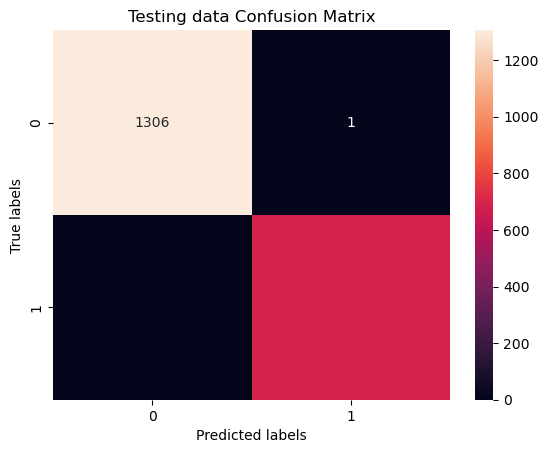

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='log_loss',max_depth=7,random_state=42,max_features = 300)
dt_model.fit(X_train, y_train)
## Performance Matrix on train data set
dt_model_ypred_train = dt_model.predict(X_train)
dt_model_train_score = dt_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",dt_model_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, dt_model_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, dt_model_ypred_train))## classification_report
## Performance Matrix on test data set
dt_model_ypred_test = dt_model.predict(X_test)
dt_model_test_score = dt_model.score(X_test, y_test)
print("Testing Accuracy : ",dt_model_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, dt_model_ypred_test))
print(metrics.classification_report(y_test, dt_model_ypred_test))

# Example confusion matrix (replace with your actual values)
dt_modeltrain_conf =metrics.confusion_matrix(y_train, dt_model_ypred_train)

# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(dt_modeltrain_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
dt_modeltest_conf =metrics.confusion_matrix(y_test, dt_model_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(dt_modeltest_conf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 1.000
AUC: 1.000


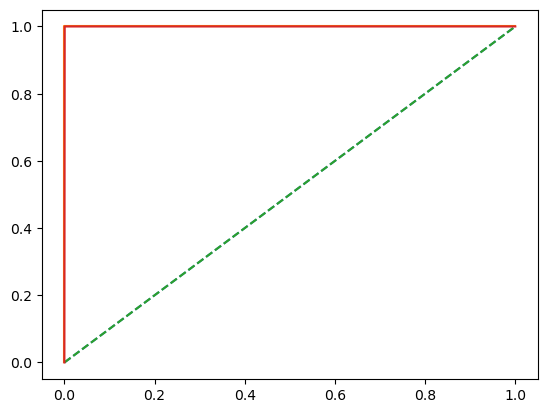

In [38]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

optimal depth is 3 

i tried multiple ways to tune this model but i am getting same result.

### Decision tree model performace report

In [39]:

model_performance = {'model_name': ['Decision Tree Base model','Tuned Decision Tree model with GrCV'],
    'Training Accuracy':['100','100'],
    'Testing Accuracy':['99.95','99.95'],
    'Training AUC':['100','100'],
    'Testing AUC':['100','100'],
    'Hyper parameters used':['Default','max_depth: 3']}


In [40]:
All_models = pd.DataFrame(model_performance)
All_models.sort_values(by='Testing Accuracy')

,model_name,Training Accuracy,Testing Accuracy,Training AUC,Testing AUC,Hyper parameters used
0,Decision Tree Base model,100,99.95,100,100,Default
1,Tuned Decision Tree model with GrCV,100,99.95,100,100,max_depth: 3


## 5. Based on the model hyper-parameters used in question 2, 3 and question 4,  share your understanding of hyper-parameters tuning in ML model development

based on my knowledge i will say hyper parameters tuning is fine by default but in some specific case it helps alot to reach our goal of analysis like every model has its own hyper parameters and with the help of it we can tune our model manually some times what happened is we get noisy dataset or imbalance dataset or regression or classification problems so that time we may need some manual tuning so hyper parameters tuning helps alot to make model less noisy and more reliable.